In [ ]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
imgsize=256
batchsize=32
CHANELLS=3
EPOCHS=10

In [ ]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/PlantVillage",
    shuffle=True,
     image_size=(imgsize,imgsize),
    batch_size=batchsize
)

Found 2162 files belonging to 4 classes.


In [ ]:
classe_names=data.class_names
data.class_names

['.ipynb_checkpoints',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

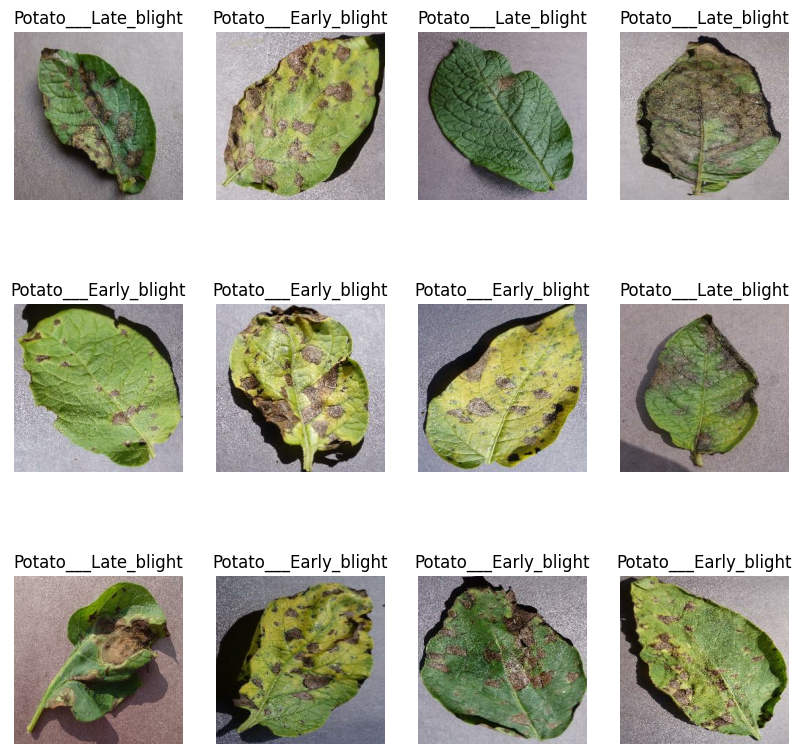

In [ ]:
plt.figure(figsize=(10,10))
for image_batch ,label_batch in data.take(1):
  for i in range (12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis('off')
    plt.title(classe_names[label_batch[i].numpy()])
    image_batch[i].numpy().astype("uint8").shape


In [ ]:
def get_data_partition_tf(data,train_size=0.8,test_size=0.1,val_size=0.1
                          ,shuffle=True,shuffle_size=10000):
  if shuffle:
    data=data.shuffle(shuffle_size, seed=12)
  data_train=data.take(int(len(data)*train_size))
  data_val=data.take(int(len(data)*val_size))
  data_test=data.skip(int(len(data)*train_size)).skip(int(len(data)*val_size))
  return (data_train,data_val,data_test)

In [ ]:
(data_train,data_val,data_test)=get_data_partition_tf(data)

In [ ]:
train_ds=data_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds=data_val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=data_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
len(train_ds)

54

In [ ]:
scalling_recizing = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(imgsize,imgsize),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augementation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(0.4)
])

In [ ]:
# Définition de la taille de lot (batchsize), de la taille de
#l'image (imgsize) et des canaux de couleur (CHANELLS)
input_shape = (batchsize, imgsize, imgsize, CHANELLS)

# Création du modèle séquentiel
model = tf.keras.Sequential([
    scalling_recizing,  # Prétraitement : redimensionnement et mise à l'échelle
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),  # Aplatir les caractéristiques extraites
    tf.keras.layers.Dense(32, activation='relu'),  # Couche dense
    tf.keras.layers.Dense(4, activation='softmax')  # Couche de sortie pour
                                                    #la classification à 3 classes
])

# Construire le modèle avec la forme d'entrée spécifiée
model.build(input_shape)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,        # Define the number of epochs
    batch_size=batchsize, # Define the batch size
    verbose=1,
    validation_data=valid_ds
)

Epoch 1/10
54/54 [==============================] - 169s 3s/step - loss: 0.9609 - accuracy: 0.4595 - val_loss: 0.8804 - val_accuracy: 0.4427
Epoch 2/10
54/54 [==============================] - 149s 3s/step - loss: 0.6674 - accuracy: 0.6713 - val_loss: 0.5226 - val_accuracy: 0.7708
Epoch 3/10
54/54 [==============================] - 149s 3s/step - loss: 0.3998 - accuracy: 0.8281 - val_loss: 0.3215 - val_accuracy: 0.8906
Epoch 4/10
54/54 [==============================] - 149s 3s/step - loss: 0.2142 - accuracy: 0.9230 - val_loss: 0.1398 - val_accuracy: 0.9479
Epoch 5/10
54/54 [==============================] - 148s 3s/step - loss: 0.1661 - accuracy: 0.9439 - val_loss: 0.1344 - val_accuracy: 0.9688
Epoch 6/10
54/54 [==============================] - 147s 3s/step - loss: 0.1533 - accuracy: 0.9416 - val_loss: 0.1589 - val_accuracy: 0.9323
Epoch 7/10
54/54 [==============================] - 147s 3s/step - loss: 0.1330 - accuracy: 0.9450 - val_loss: 0.0997 - val_accuracy: 0.9635
Epoch 8/10
54

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 10s 841ms/step - loss: 0.0508 - accuracy: 0.9844


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

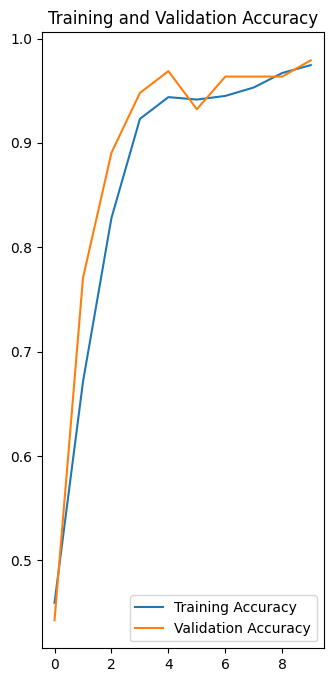

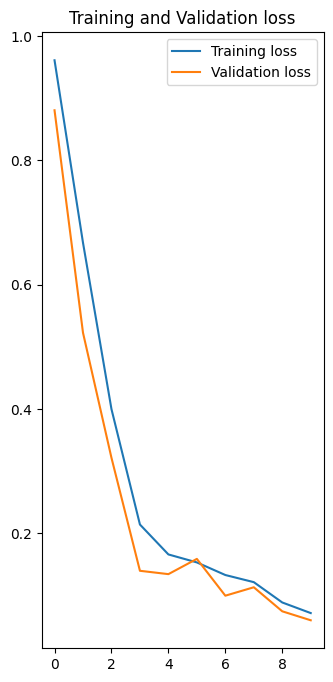

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

first image to predict
actual_label Potato___Late_blight
1/1 [==============================] - 1s 753ms/step
Potato___Late_blight


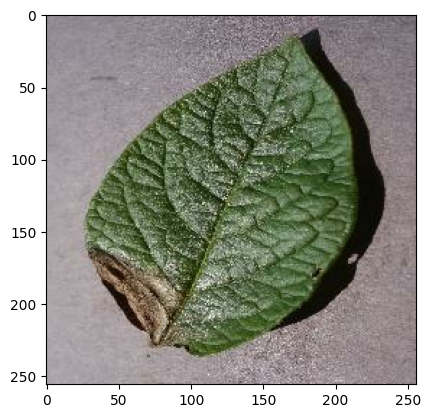

In [ ]:
for image_batch , label_batch in train_ds.take(1):
  first_image=image_batch[0].numpy().astype('uint8')
  first_label=label_batch[0].numpy()
  print('first image to predict')
  plt.imshow(first_image)
  print('actual_label',classe_names[first_label])
  batch_prediction=model.predict(image_batch)
  print(classe_names[np.argmax(batch_prediction[0])])